<a href="https://colab.research.google.com/github/elenakelly/Deep-Learning-Emotion-Detection/blob/main/DeepLearningCNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
#with zipfile.ZipFile("data/archive.zip","r") as zip_ref:
#    zip_ref.extractall("data")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import os

In [5]:
#train_data = 'drive/MyDrive/DatAss3/archive/train'
#test_data = 'drive/MyDrive/DatAss3/archive/test'

train_data = "drive/MyDrive/archive/train/"
test_data = "drive/MyDrive/archive/test"

In [6]:
train_data_generator = ImageDataGenerator(rescale=1./255, rotation_range=30,shear_range=0.3,zoom_range=0.3, horizontal_flip=True, fill_mode='nearest')
test_data_generator = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_data_generator.flow_from_directory(train_data, color_mode='grayscale',target_size=(48,48),batch_size=32,class_mode='categorical',shuffle=True)
test_generator = test_data_generator.flow_from_directory(test_data, color_mode='grayscale',target_size=(48,48),batch_size=32,class_mode='categorical',shuffle=True)

Found 28759 images belonging to 7 classes.
Found 7208 images belonging to 7 classes.


In [8]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

In [9]:
import random

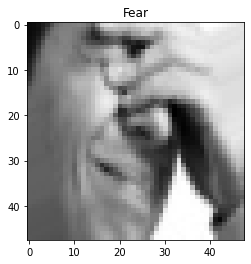

In [10]:
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [16]:
# Create the  first model
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=(48, 48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                      

In [17]:
train_path = "drive/MyDrive/archive/train/"
test_path = "drive/MyDrive/archive/test"

#train_path = 'drive/MyDrive/DatAss3/archive/train'
#test_path = 'drive/MyDrive/DatAss3/archive/test'

In [18]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [19]:
epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=test_generator,
                validation_steps=num_test_imgs//32)

model.save('model2.h5')

Epoch 1/50
898/898 [==============================] - 9747s 11s/step - loss: 1.7694 - accuracy: 0.2997 - val_loss: 1.6919 - val_accuracy: 0.3401
Epoch 2/50
898/898 [==============================] - 72s 80ms/step - loss: 1.5206 - accuracy: 0.4088 - val_loss: 1.5939 - val_accuracy: 0.3908
Epoch 3/50
898/898 [==============================] - 72s 80ms/step - loss: 1.3990 - accuracy: 0.4650 - val_loss: 1.4740 - val_accuracy: 0.4278
Epoch 4/50
898/898 [==============================] - 72s 80ms/step - loss: 1.3297 - accuracy: 0.4910 - val_loss: 1.2661 - val_accuracy: 0.5136
Epoch 5/50
898/898 [==============================] - 72s 80ms/step - loss: 1.2744 - accuracy: 0.5144 - val_loss: 1.4465 - val_accuracy: 0.4450
Epoch 6/50
898/898 [==============================] - 73s 81ms/step - loss: 1.2493 - accuracy: 0.5210 - val_loss: 1.2622 - val_accuracy: 0.5229
Epoch 7/50
898/898 [==============================] - 72s 80ms/step - loss: 1.2177 - accuracy: 0.5369 - val_loss: 1.1603 - val_accuracy

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

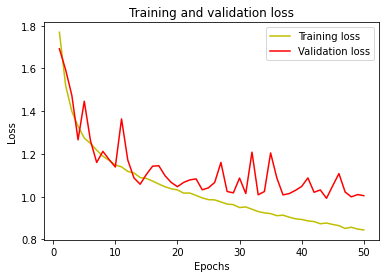

In [21]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

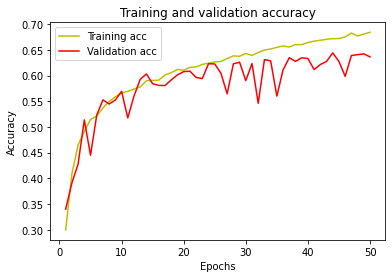

In [22]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from keras.models import load_model

In [24]:
#Test the model
my_model = load_model('model2.h5', compile=False)


In [25]:

#Generate a batch of images
test_img, test_lbl = test_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [26]:
from sklearn import metrics

In [27]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.65625


In [28]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)

In [30]:
import seaborn as sns

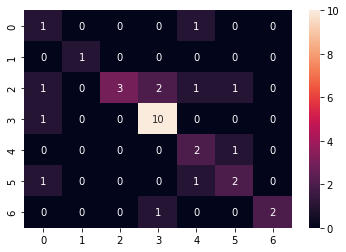

In [31]:
sns.heatmap(cm, annot=True)

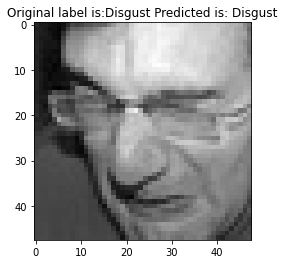

In [32]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [33]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [39]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [40]:
cap = cv2.VideoCapture('test.mp4')

In [41]:
from keras.preprocessing.image import img_to_array

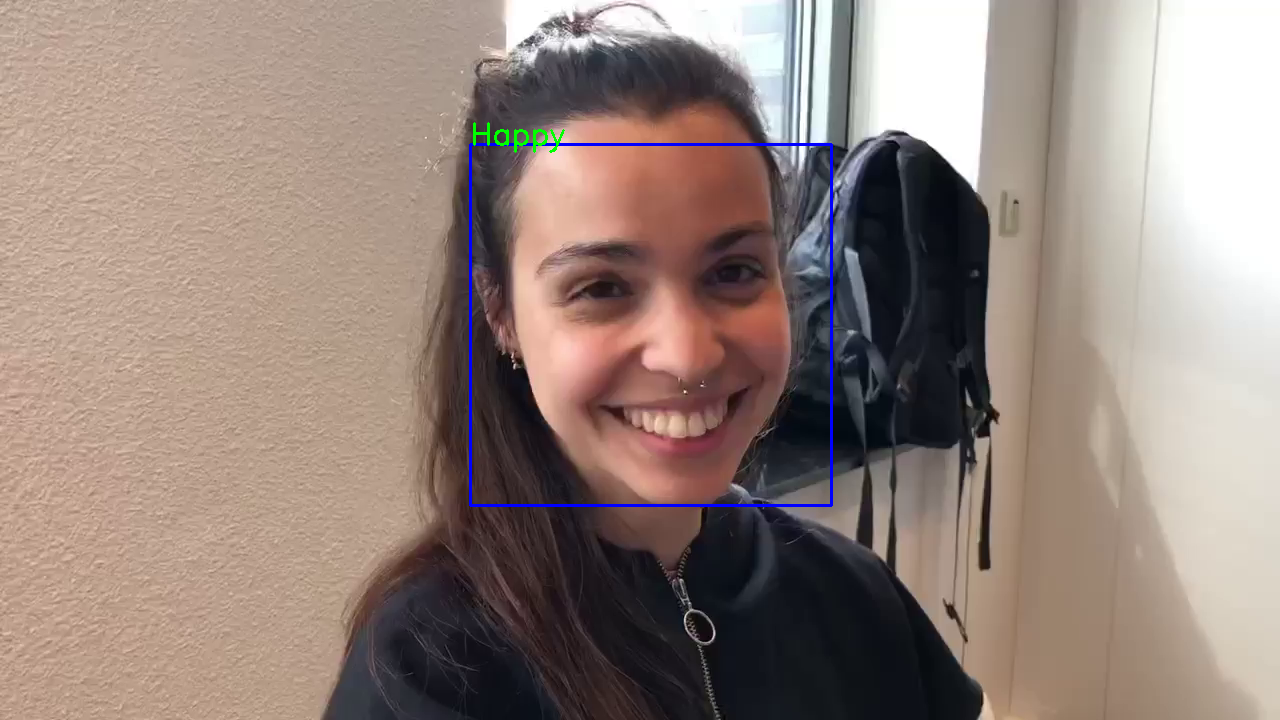

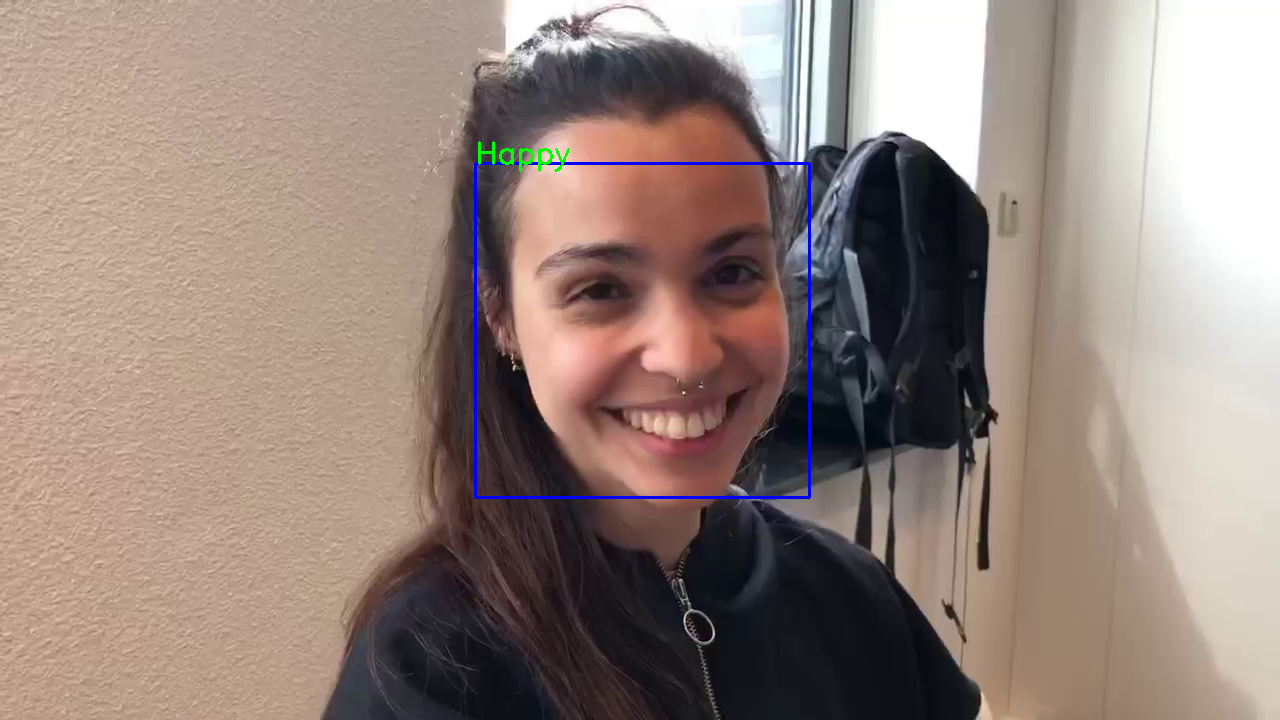

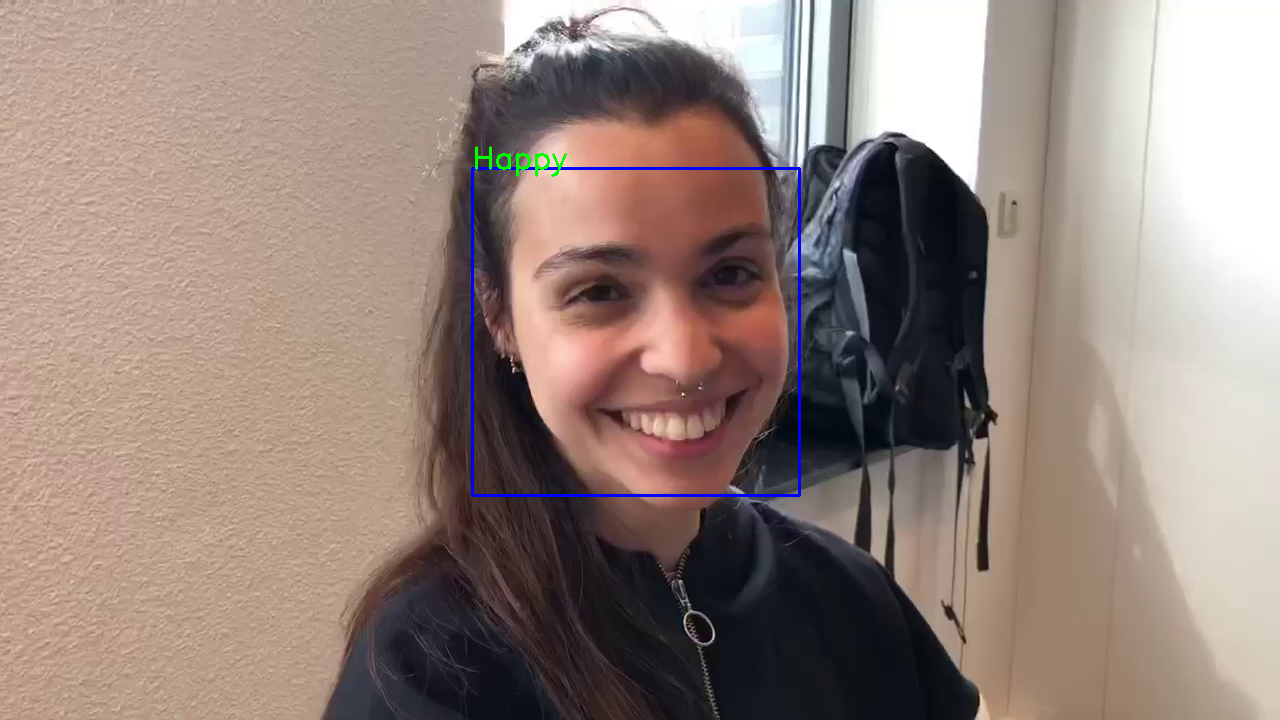

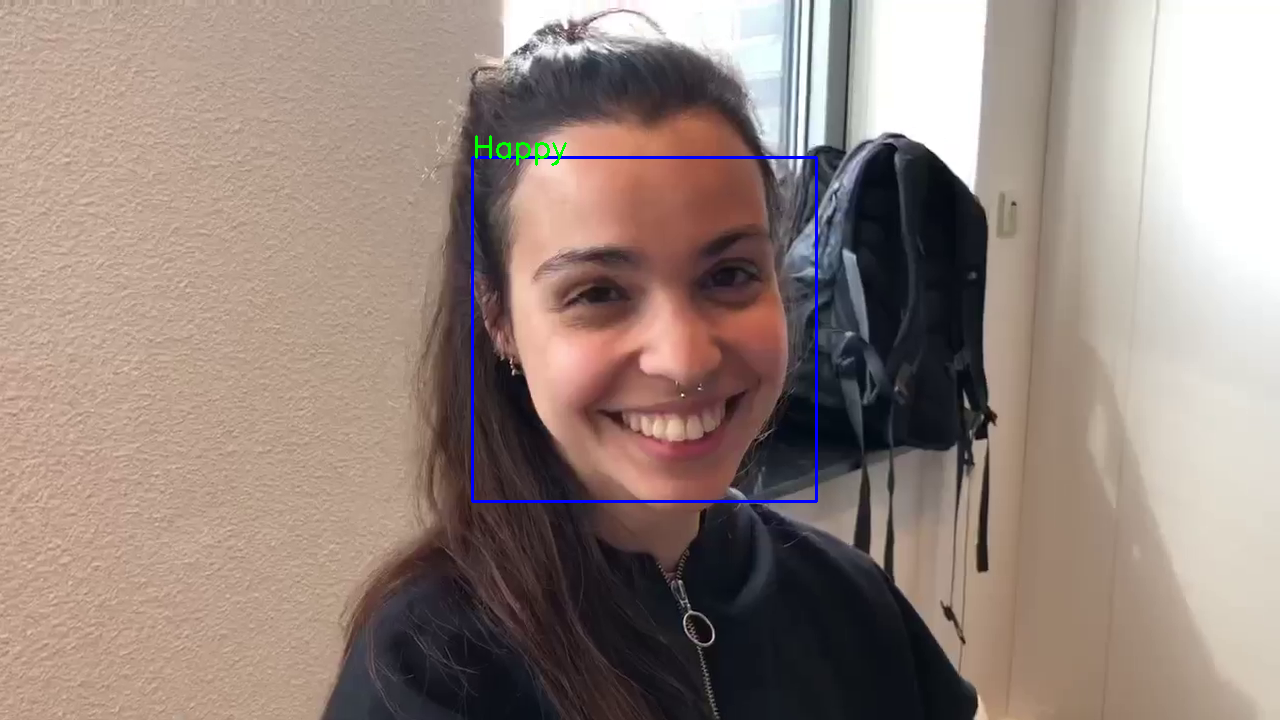

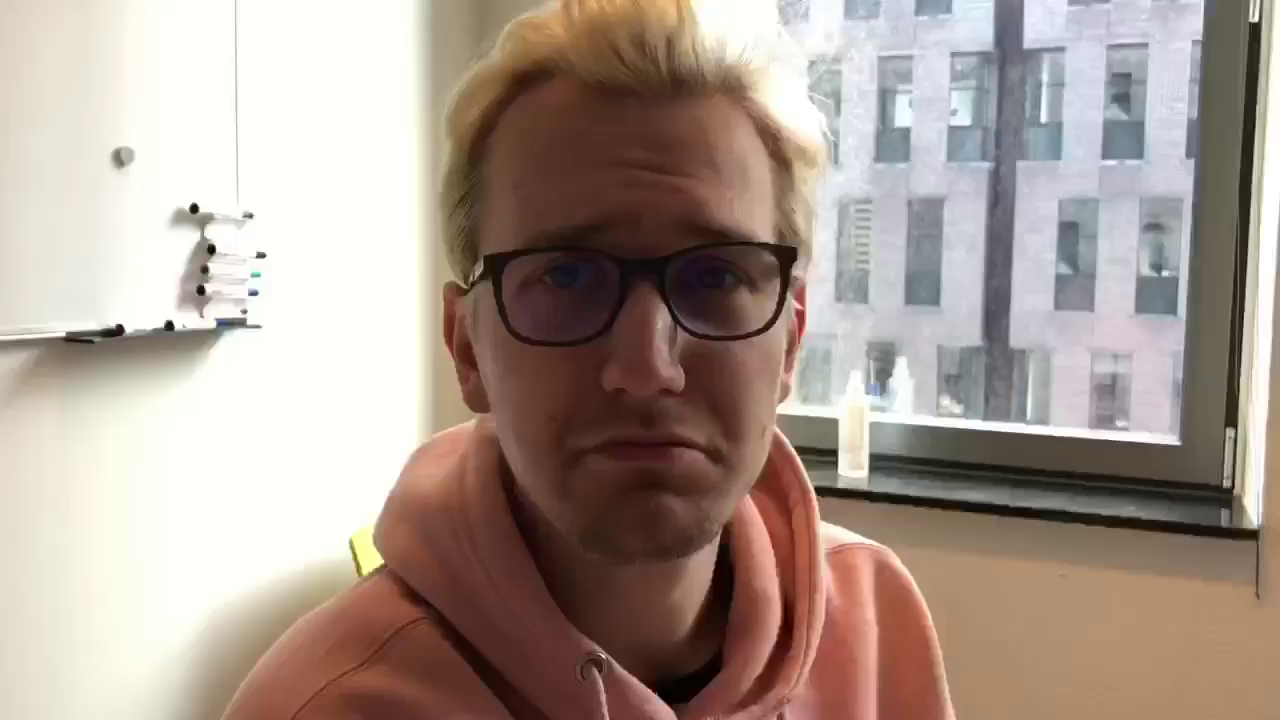

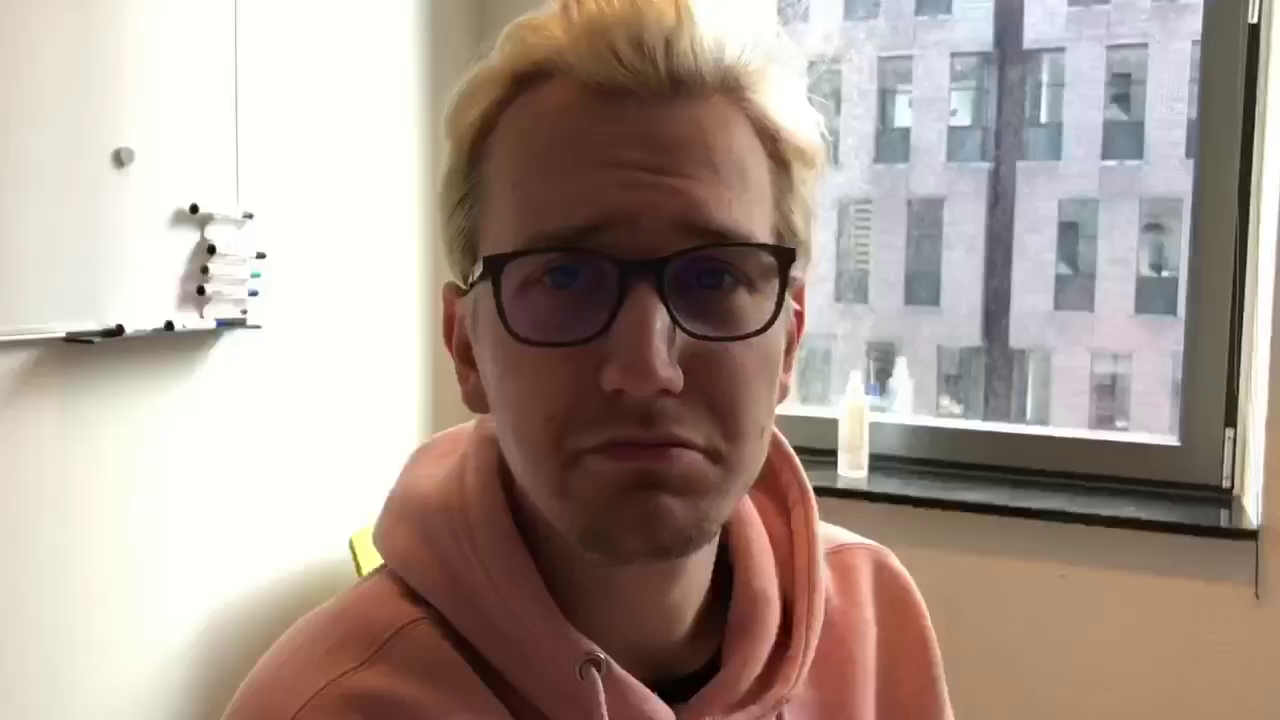

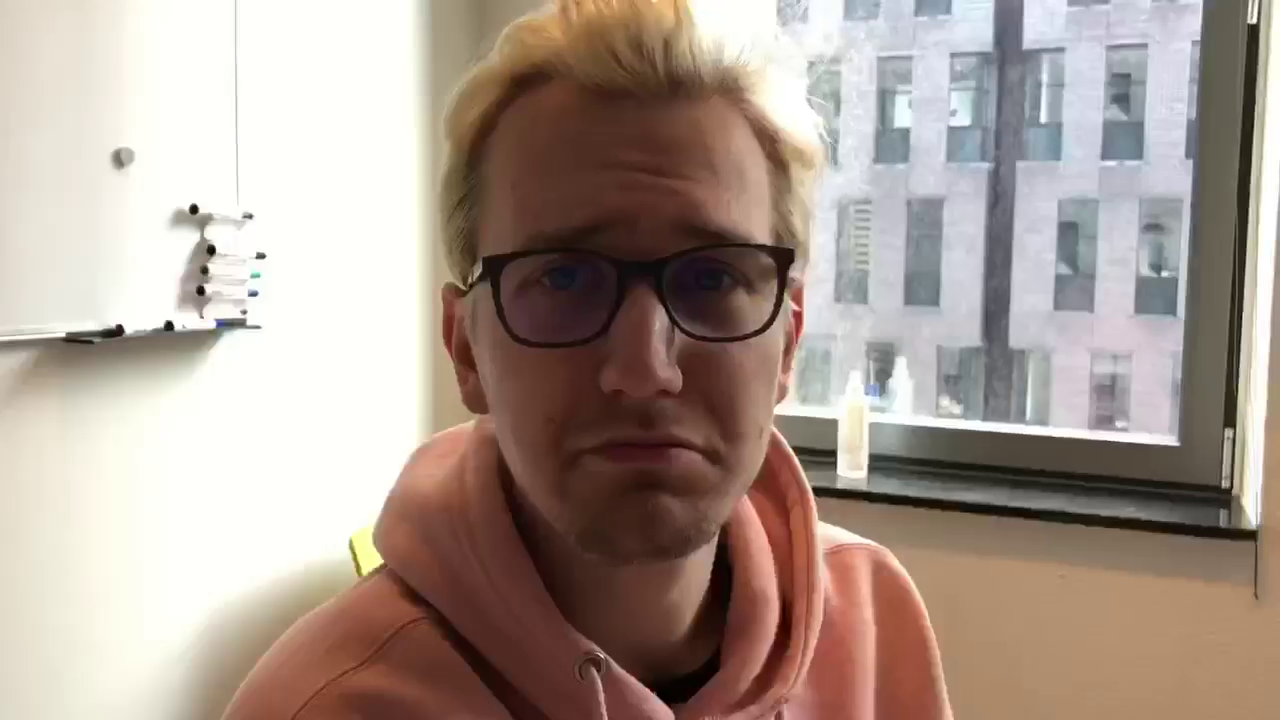

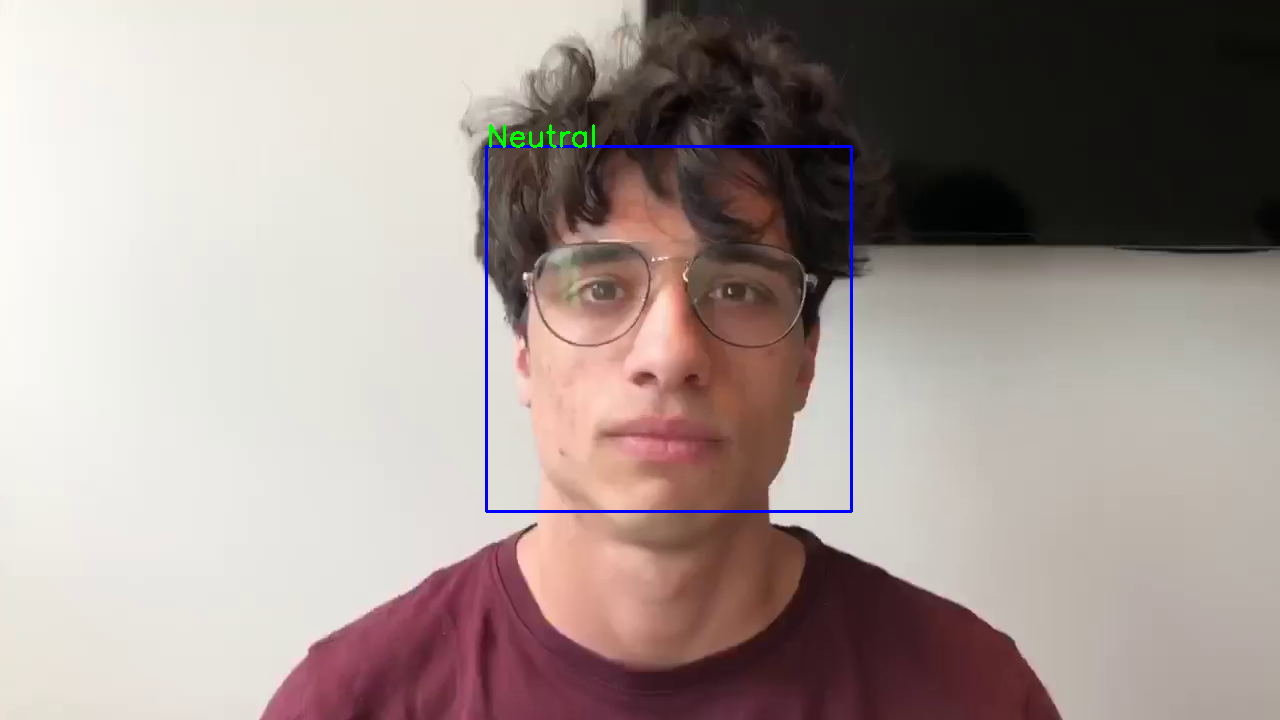

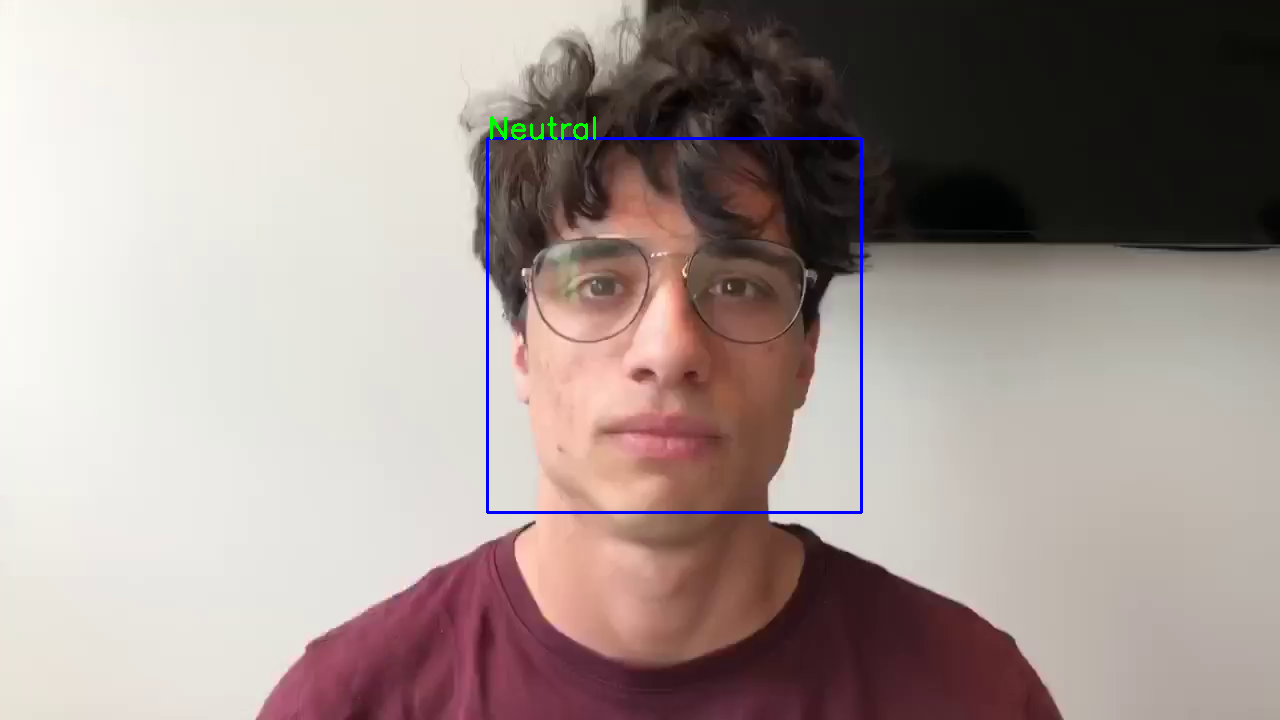

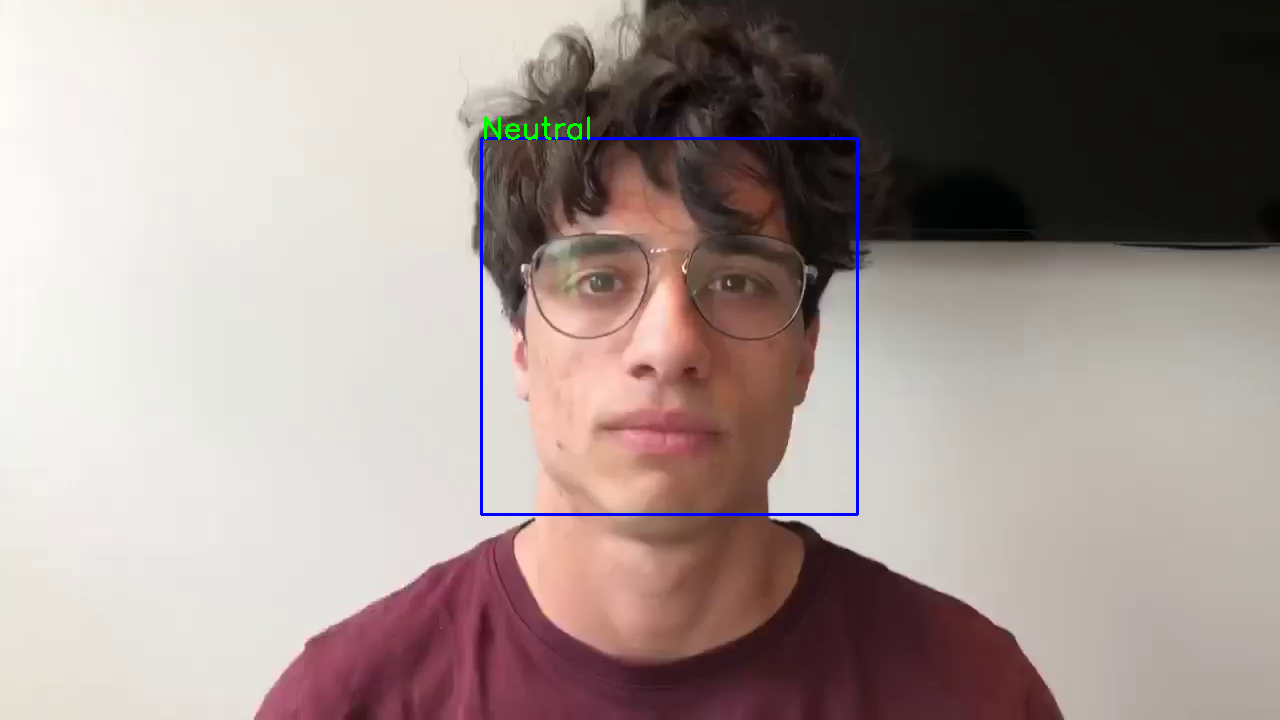

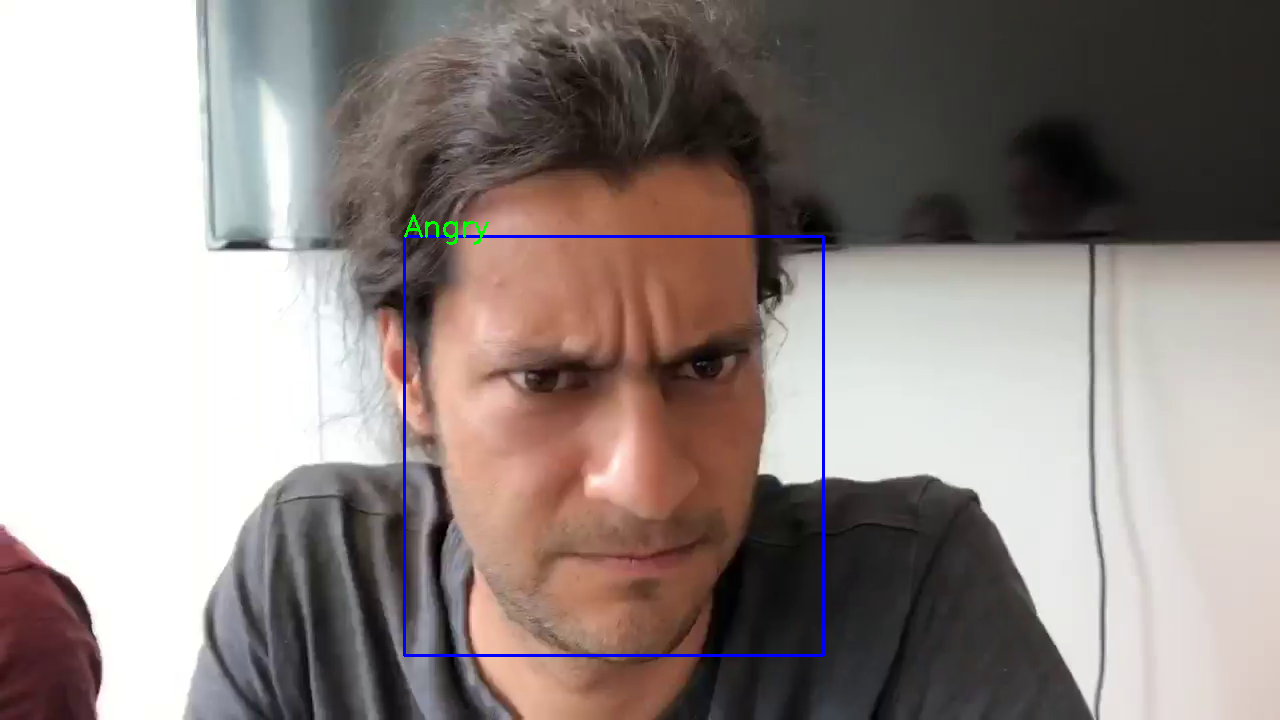

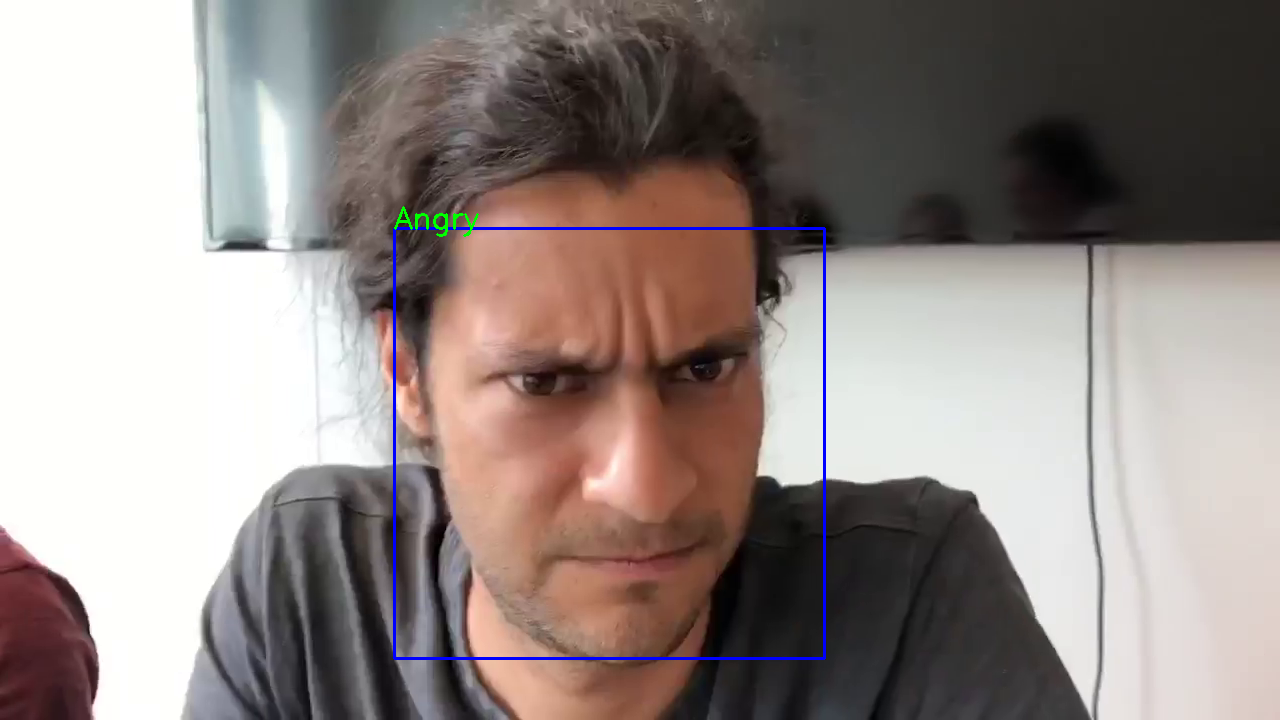

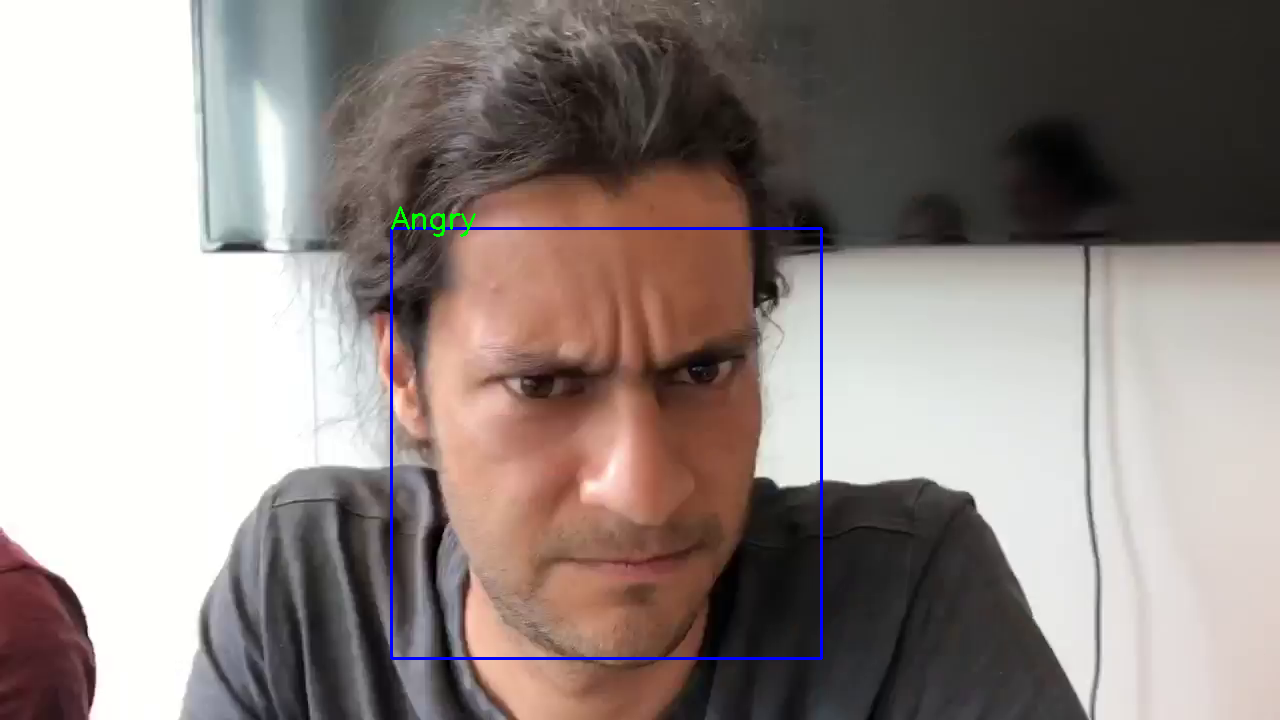

In [43]:
# For the video testing
cap = cv2.VideoCapture('test.mp4')
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
while True:
    ret,frame=cap.read()
    labels=[]
    if(frame is not None):
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
      break
    faces=face_cascade.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        
        #Get image ready for prediction
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

        preds=my_model.predict(roi)[0]  #Yields one hot encoded result for 7 classes
        label=class_labels[preds.argmax()]  #Find the label
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
              

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [44]:
cap.release()
cv2.destroyAllWindows()